## EDA



In [1]:
# Reading Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_user_filtered = pd.read_csv('/content/user-filtered.csv')

In [ ]:
df_anime = pd.read_csv('/content/anime-dataset-2023.csv')
df_user  = pd.read_csv('/content/users-details-2023.csv')
df_scores = pd.read_csv('/content/users-score-2023.csv')

In [ ]:
# Información de df_anime
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [ ]:
df_anime.head(2)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...


In [ ]:
# Reemplazar los valores 'UNKNOWN' por NaN en las columnas seleccionadas
df_numeric = df_anime[['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']]
df_numeric= df_numeric.replace('UNKNOWN', np.nan)

# Eliminar filas con valores NaN en las columnas seleccionadas
df_anime_cleaned = df_numeric.dropna(subset=['Score', 'Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members'])

# Mostrar el DataFrame limpio
print(df_anime_cleaned)

      Score Episodes    Rank  Popularity  Favorites Scored By  Members
0      8.75     26.0    41.0          43      78525  914193.0  1771505
1      8.38      1.0   189.0         602       1448  206248.0   360978
2      8.22     26.0   328.0         246      15035  356739.0   727252
3      7.25     26.0  2764.0        1795        613   42829.0   111931
4      6.94     52.0  4240.0        5126         14    6413.0    15001
...     ...      ...     ...         ...        ...       ...      ...
24557  7.78     18.0   963.0        9993         68     662.0     2492
24579  5.84      1.0  9552.0        8772         10    1971.0     3828
24590  5.99      1.0  8891.0       14796          1     129.0      518
24729  6.07      1.0  8521.0       15097          1     114.0      482
24831  6.29      1.0  7480.0       14291          1     320.0      593

[12650 rows x 7 columns]


Matriz de Correlación:


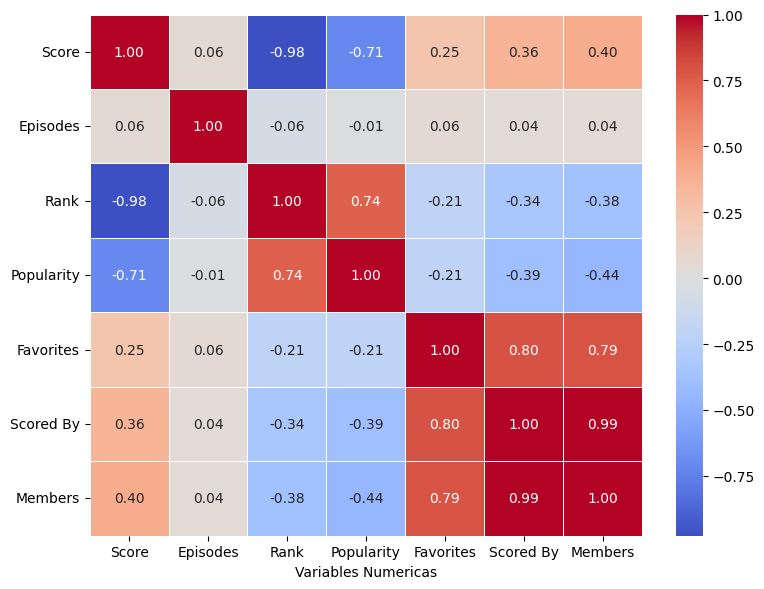

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_anime_cleaned.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
correlation_matrix

# Configurar el gráfico de heatmap
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Añadir título y etiquetas
#plt.title('Matriz de Correlación')
plt.xlabel('Variables Numericas')

# Mostrar el heatmap
plt.tight_layout()
plt.show()

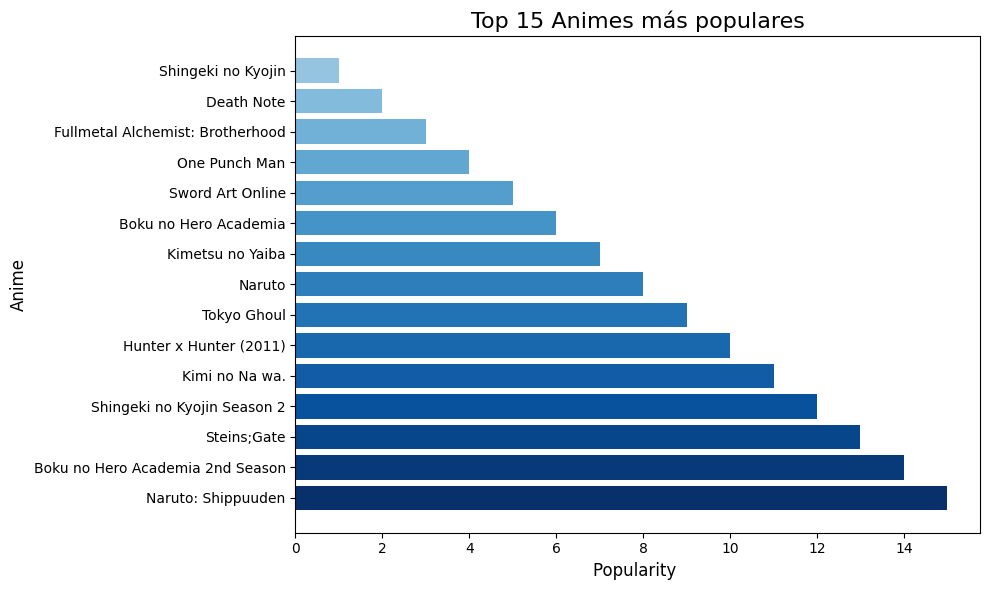

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar animes con Popularity > 0
df_valid_popularity = df_anime[df_anime['Popularity'] > 0]

# Ordenar el DataFrame por Popularity y seleccionar los 15 más populares
top_15_popular = df_valid_popularity.sort_values(by='Popularity', ascending=True).head(15)

# Configurar los colores en un tono de azules
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_15_popular)))  # Más oscuro -> más claro

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(top_15_popular['Name'], top_15_popular['Popularity'], color=colors)

# Agregar etiquetas y título
plt.xlabel('Popularity ', fontsize=12)
plt.ylabel('Anime', fontsize=12)
plt.title('Top 15 Animes más populares', fontsize=16)

# Invertir el eje Y para que el más popular esté arriba
plt.gca().invert_yaxis()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

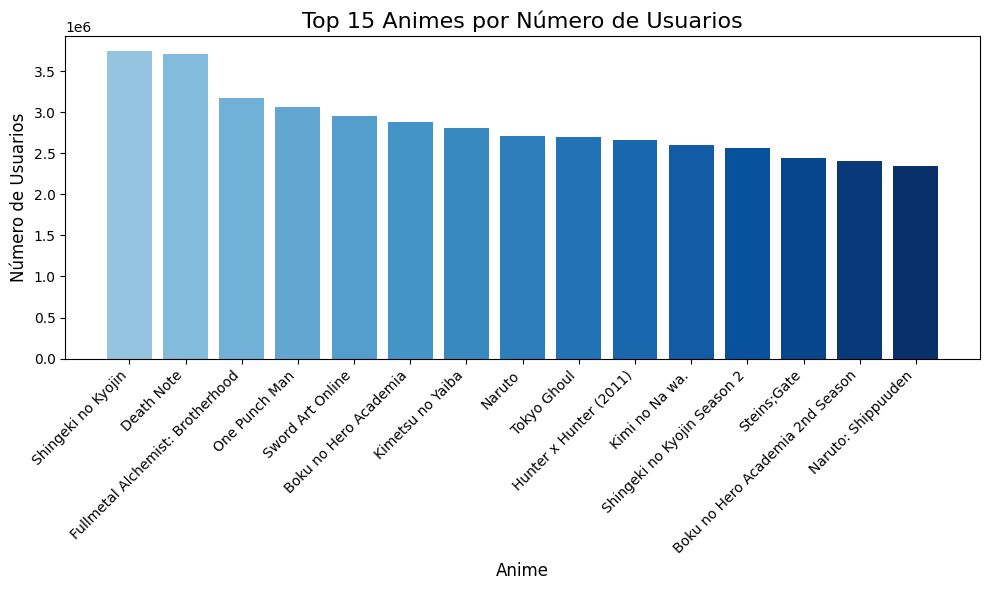

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ordenar el DataFrame por 'Members' y seleccionar los 15 animes con más usuarios
top_15_scored = df_anime.sort_values(by='Members', ascending=False).head(15)

# Crear colores únicos para cada barra
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_15_scored)))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top_15_scored['Name'], top_15_scored['Members'], color=colors)

# Agregar etiquetas a los ejes y título
plt.xlabel('Anime', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.title('Top 15 Animes por Número de Usuarios', fontsize=16)

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Información de df_users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [ ]:
df_users.columns

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')

Matriz de Correlación:


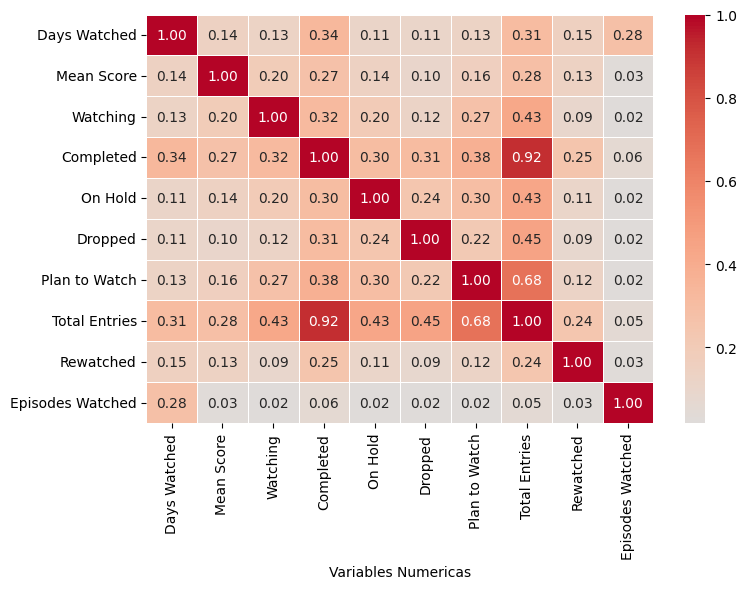

In [ ]:
df_users_numeric = df_users[['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
                             'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched']]
df_users_numeric= df_users_numeric.replace('NaN', np.nan)

# Calcular la matriz de correlación
correlation_matrix = df_users_numeric.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
correlation_matrix

# Configurar el gráfico de heatmap
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

# Añadir título y etiquetas
#plt.title('Matriz de Correlación')
plt.xlabel('Variables Numericas')

# Mostrar el heatmap
plt.tight_layout()
plt.show()

In [ ]:
# Información de df_scores
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157416 entries, 0 to 12157415
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   Username     object 
 2   anime_id     int64  
 3   Anime Title  object 
 4   rating       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 463.8+ MB


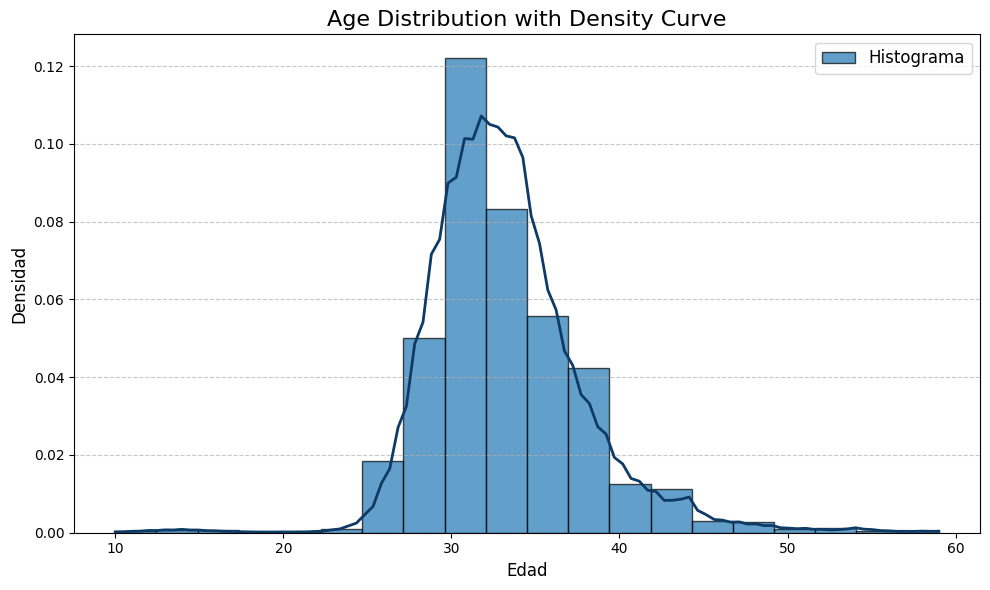

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import gaussian_kde

# Función para calcular la edad a partir de la columna 'Birthday'
def calculate_age(birth_date):
    if birth_date != 'NaN':
        try:
            birth_year = int(birth_date.split('-')[0])  # Extraer el año de nacimiento
            today_year = datetime.utcnow().year
            age = today_year - birth_year
            if 10 <= age < 60:  # Validar el rango de edad (puedes modificarlo según sea necesario)
                return age
            else:
                return None
        except:
            return None
    return None

# Aplicar la función a la columna 'Birthday'
Age = df_user['Birthday'].dropna().apply(calculate_age)

# Filtrar edades válidas
Age = Age.dropna()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(Age, bins=20, color='#1f77b4', edgecolor='black', alpha=0.7, density=True, label='Histograma')  # Normalizar el histograma

# Calcular la curva de densidad
density = gaussian_kde(Age)
x_vals = np.linspace(min(Age), max(Age), 100)  # Crear puntos para la curva
density_vals = density(x_vals)

# Graficar la curva de densidad
plt.plot(x_vals, density_vals, color='#0d3b66', linewidth=2)

# Configurar etiquetas y título
plt.title('Age Distribution with Density Curve', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Agregar cuadrícula y leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


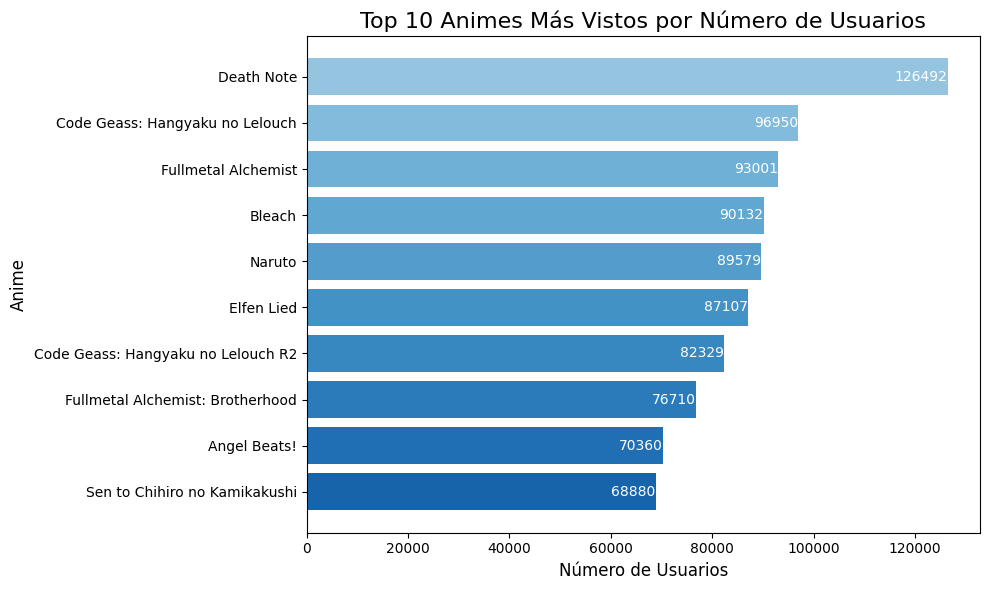

In [ ]:

# Obtener el número de usuarios únicos que vieron cada título de anime
anime_watch_count = df_scores.groupby('Anime Title')['user_id'].nunique().reset_index()
anime_watch_count = anime_watch_count.rename(columns={'user_id': 'Número de Usuarios'})

# Ordenar por la cantidad de usuarios y seleccionar los 10 primeros
top_n = 10
anime_watch_count = anime_watch_count.sort_values(by='Número de Usuarios', ascending=False)
top_anime_watch_count = anime_watch_count.head(top_n)

# Definir una paleta de colores en tonos de azul
color_palette = plt.cm.Blues(np.linspace(0.4, 0.8, top_n))

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(top_anime_watch_count['Anime Title'], top_anime_watch_count['Número de Usuarios'], color=color_palette)

# Invertir el eje Y para que el anime con más usuarios esté arriba
plt.gca().invert_yaxis()

# Agregar etiquetas y título en español
plt.xlabel('Número de Usuarios', fontsize=12)
plt.ylabel('Anime', fontsize=12)
plt.title(f'Top {top_n} Animes Más Vistos por Número de Usuarios', fontsize=16)

# Agregar valores dentro de cada barra
for bar in bars:
    plt.text(bar.get_width() - 30, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='right', fontsize=10, color='white')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
df_scores.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [ ]:
# Cantidad de registros por rating
rating_counts = df_scores['rating'].value_counts().sort_index()
rating_counts


,count
rating,
1,98069
2,132092
3,233675
4,562822
5,1379480
6,2766482
7,5452152
8,6060484
9,4429914


rating
1       98069
2      132092
3      233675
4      562822
5     1379480
6     2766482
7     5452152
8     6060484
9     4429914
10    3210021
Name: count, dtype: int64


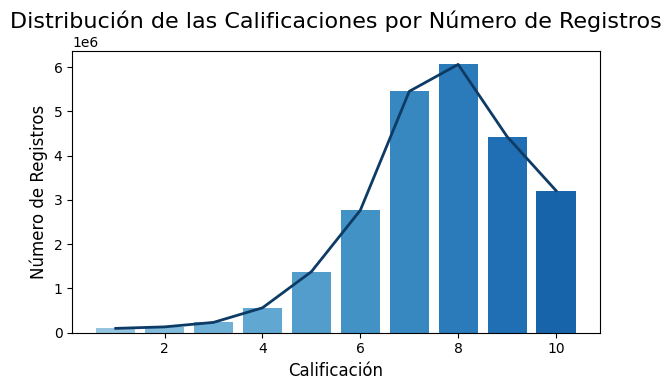

In [ ]:
#cuenta de rating por registro
rating_counts = df_scores['rating'].value_counts().sort_index()
print(rating_counts)
# Definir la paleta de colores (tonos de azul)
color_palette = plt.cm.Blues(np.linspace(0.4, 0.8, len(rating_counts)))

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(rating_counts.index, rating_counts.values, color=color_palette)

# Graficar la curva de densidad
plt.plot(rating_counts.index, rating_counts.values, color='#0d3b66', linewidth=2)

# Agregar etiquetas y título
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.title('Distribución de las Calificaciones por Número de Registros', fontsize=16)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# imprimir cantidad de registros de df_scores
print(f"Cantidad de registros en df_scores: {len(df_scores)}")

Cantidad de registros en df_scores: 24325191


In [29]:
df_user_filtered

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10
...,...,...,...
109224742,353404,507,7
109224743,353404,392,9
109224744,353404,882,6
109224745,353404,883,8


In [32]:
df_user_filtered['anime_id'].nunique()

17562

In [9]:
# Cantidad de registros por rating
rating_counts_filtered = df_user_filtered['rating'].value_counts().sort_index()
#suma de rating counts
print(rating_counts_filtered.sum())
rating_counts_filtered

109224747


,count
rating,
0,46827035
1,480688
2,545339
3,905700
4,1845854
5,4029645
6,7543377
7,14244633
8,15422150


In [6]:
print(f"Cantidad de registros en df_scores: {len(df_user_filtered)}")

Cantidad de registros en df_scores: 6477125


rating
0     46827035
1       480688
2       545339
3       905700
4      1845854
5      4029645
6      7543377
7     14244633
8     15422150
9     10235934
10     7144392
Name: count, dtype: int64


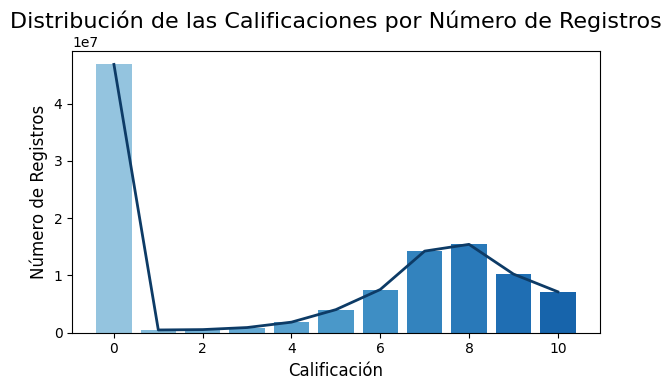

In [13]:
#cuenta de rating por registro
rating_counts_filtered = df_user_filtered['rating'].value_counts().sort_index()
print(rating_counts_filtered)
# Definir la paleta de colores (tonos de azul)
color_palette = plt.cm.Blues(np.linspace(0.4, 0.8, len(rating_counts_filtered)))

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(rating_counts_filtered.index, rating_counts_filtered.values, color=color_palette)

# Graficar la curva de densidad
plt.plot(rating_counts_filtered.index, rating_counts_filtered.values, color='#0d3b66', linewidth=2)

# Agregar etiquetas y título
plt.xlabel('Calificación', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.title('Distribución de las Calificaciones por Número de Registros', fontsize=16)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [28]:

print(f'Total de calificaciones {rating_counts_filtered.sum()}')
rating_counts_filtered

Total de calificaciones 109224747


,count
rating,
0,46827035
1,480688
2,545339
3,905700
4,1845854
5,4029645
6,7543377
7,14244633
8,15422150


In [25]:
# filtrar los ranking diferentes a 0
ranking_filtered = df_user_filtered[df_user_filtered['rating'] != 0]
rating = ranking_filtered['rating'].value_counts().sort_index()

print(rating.sum())
rating

62397712


,count
rating,
1,480688
2,545339
3,905700
4,1845854
5,4029645
6,7543377
7,14244633
8,15422150
9,10235934


In [33]:
df_user_filtered.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [35]:
# Calificación del top 10 animes mejor calificados
anime_rank = ranking_filtered.groupby('anime_id')['rating'].mean().sort_values(ascending=False).head(15)
anime_rank



,rating
anime_id,
47795,10.0
48418,10.0
41218,10.0
35024,10.0
35051,10.0
48413,10.0
48417,10.0
41456,10.0
41461,10.0


In [56]:
import plotly.figure_factory as ff
from datetime import datetime

# Definir las tareas del proyecto
tasks = [
    dict(Task="Definición de Objetivos", Start='2024-09-01', Finish='2024-09-30', Resource='Planificación'),
    dict(Task="Revisión de Literatura y trabajos previos", Start='2024-09-01', Finish='2024-09-30', Resource='Planificación'),
    dict(Task="Definir Infraestructura en la Nube", Start='2024-09-01', Finish='2024-09-30', Resource='Planificación'),
    dict(Task="Exploración de los datos", Start='2024-09-07', Finish='2024-10-15', Resource='Procesamiento de los datos'),
    dict(Task="Preprocesamiento de Datos", Start='2024-09-23', Finish='2024-10-15', Resource='Procesamiento de los datos'),
    dict(Task="Transformación de datos e Ingeniería de Caracteristicas", Start='2024-09-23', Finish='2024-10-15', Resource='Procesamiento de los datos'),
    dict(Task="Modelo Basado en Contenido", Start='2024-10-07', Finish='2024-11-07', Resource='Modelos'),
    dict(Task="Modelo Filtro Colaborativo", Start='2024-10-07', Finish='2024-11-07', Resource='Modelos'),
    dict(Task="Ensamble de Modelos(T. Posterior)", Start='2024-11-01', Finish='2024-11-15', Resource='Modelos'),
    dict(Task="Evaluación con Metricas definidas", Start='2024-10-31', Finish='2024-11-15', Resource='Evaluación'),
    dict(Task="Ajuste de Iperparametros", Start='2024-10-31', Finish='2024-11-15', Resource='Evaluación'),
    dict(Task="Almacenamiento de Resultados", Start='2024-11-01', Finish='2024-11-23', Resource='Modelo Final y Desplieque'),
    dict(Task="Documentación", Start='2024-10-15', Finish='2024-11-23', Resource='Modelo Final y Desplieque'),
    dict(Task="Dllo de API para Despliegue (T. Posterior)", Start='2024-11-23', Finish='2024-11-30', Resource='Modelo Final y Desplieque'),
]

# Crear el diagrama de Gantt
fig = ff.create_gantt(
    tasks,
    index_col='Resource',
    show_colorbar=True,
    group_tasks=True,
    title='Diagrama de Gantt: Proyecto Sistema de Recomendación de Animes',
    showgrid_x=True,
    showgrid_y=True
)

# Mostrar el diagrama
fig.show()
